#Procesamiento de imágenes con Python
Algunas herramientas 
  
  1. Conocimeitos basicos de las librerı́as numpy y matplotlib
  
  2. Realizar algunas operaciones de realce.

  3. Obtener histogramas y realizar manipulaciones.

  4. Crear una mascara booleana, analizando los valores de las  iferentes 
     bandas en los histogramas .






Primeramente se configura el directorio de trabajo dentro del Drive en donde está la imagen foto.jpg


In [ ]:
#?Configuro mi ruta de acceso para IO de archivos
import os
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.image as mpimg  


from google.colab import drive
drive.mount('/content/drive')
direct = '/content/drive/MyDrive/' #modificar esta linea
os.chdir(direct)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Levantamos la imagen y la desplegamos

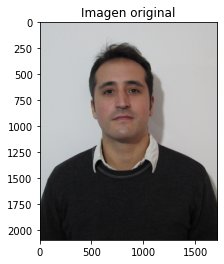

In [ ]:
foto= mpimg.imread(direct + 'IMG_0064.JPG')
plt.figure(0)
plt.title('Imagen original')
plt.imshow(foto)
plt.show() 


Podemos ver algunos datos que nos pueden interesar de la imagen.

In [ ]:
print(foto.shape)#filas , columanas , canales.
print(foto.size)# cantidad de pixeles 
print(type(foto))

(2098, 1715, 3)
10794210
<class 'numpy.ndarray'>


Visualizamos con plt.subplots la foto en sus tres canales RGB en escala de grises. 

Text(0.5, 1.0, 'Canal Azul ')

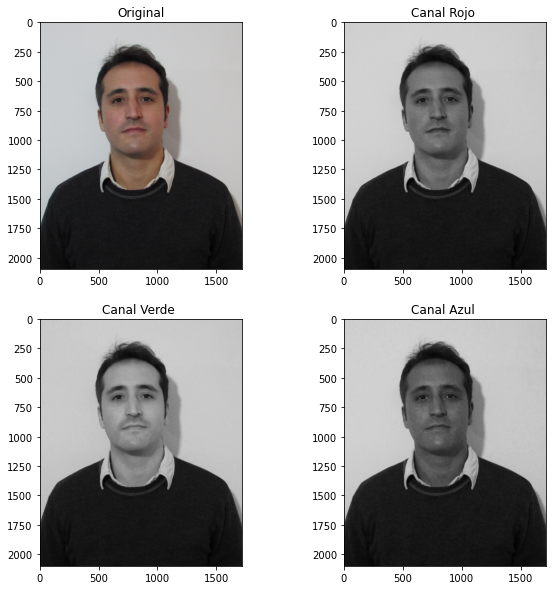

In [ ]:
fig , ax=plt.subplots(2,2 ,figsize=(10,10))
ax[0,0].imshow(foto)
ax[1,0].imshow(foto[:,:,0], 'gray')
ax[0,1].imshow(foto[:,:,1], 'gray')
ax[1,1].imshow(foto[:,:,2], 'gray')

ax[0,0].set_title('Original')
ax[1,0].set_title('Canal Verde ')
ax[0,1].set_title('Canal Rojo ')
ax[1,1].set_title('Canal Azul ')


Aqui obtenemos los histogramas para cada canal de datos usando *np.histogram* y graficamos.

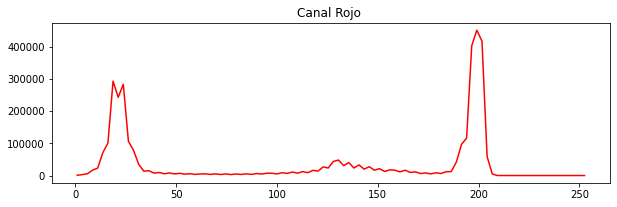

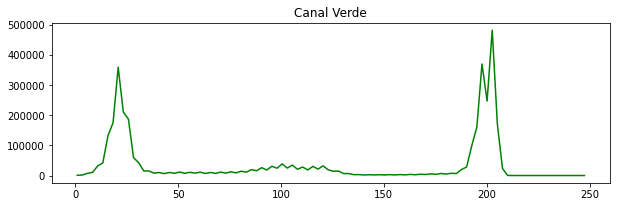

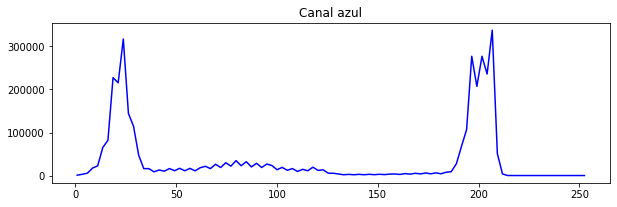

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(3,1,1)
y,x = np.histogram(foto[:, :, 0], bins=100)
plt.title('Canal Rojo ')
plt.plot(x[:-1], y, 'r')
plt.show()

plt.figure(figsize=(10,10))
plt.subplot(3,1,2)
y,x = np.histogram(foto[:, :, 1], bins=100)
plt.title('Canal Verde')
plt.plot(x[:-1], y, 'g')
plt.show()

plt.figure(figsize=(10,10))
plt.subplot(3,1,3)
y,x = np.histogram(foto[:, :, 2], bins=100)
plt.title('Canal azul')
plt.plot(x[:-1], y, 'b',)
plt.show()




Creamos una  función que produzca un realce lineal. Esta función será una transformación lineal (con 2 parámetros de entrada además del array a transformar) que  lleve los valores de  [0 a 255] a [0 a 1]. Ası́, además de realzar se están normalizando los valores y pasamos de pixeles en uint8 (enteros sin signo de 8 bits) a flotantes.


In [ ]:
def realce(imag):
     rimag= (imag -   imag.min())/ (imag.max() - imag.min())
     return rimag

#realce[realce[:,:,0] < 0] = 0
#realce[realce[:,:,0] >1] = 1


Aplicamos el realce lineal a c/u de las bandas tal que lleve el valor mínimo original a 0 y el máximo original a 1. Luego desplegamos la imagen realzada.



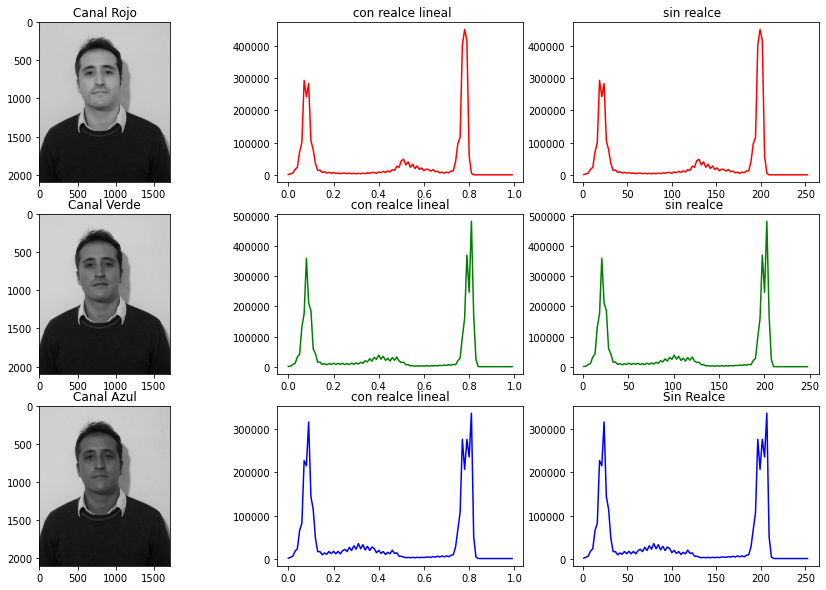

In [ ]:
realce_0 = realce(foto[:,:,0])
plt.figure(figsize=(15,10))
plt.subplot(3,3, 1 )
plt.title('Canal Rojo')
plt.imshow(realce_0,'gray' )

plt.subplot(3,3,2)
a, b = np.histogram(realce_0,bins=100)
plt.title(' con realce lineal')
plt.plot(b[:-1] ,a, 'r'  )


plt.subplot(3,3,3)
frec_0, bordes_0 = np.histogram(foto[:, :, 0], bins=100)
plt.title('sin realce  ')
plt.plot(bordes_0[:-1], frec_0, 'r')



realce_1 = realce(foto[:,:,1])
plt.subplot(3,3, 4 )
plt.title('Canal Verde')
plt.imshow(realce_1,'gray' )


plt.subplot(3,3 , 5) 
a_1, b_1 = np.histogram(realce_1,bins=100)
plt.title(' con realce lineal ')
plt.plot(b_1[:-1] ,a_1 , 'g' )

plt.subplot(3,3,6)
frec_1, bordes_1 = np.histogram(foto[:, :, 1], bins=100)
plt.title('sin realce ')
plt.plot(bordes_1[:-1], frec_1, 'g')



realce_2 = realce(foto[:,:,2]) 
plt.subplot(3,3, 7 )
plt.title('Canal Azul')
plt.imshow(realce_2,'gray' )



plt.subplot(3, 3, 8 )
plt.title('con realce lineal')
a_2, bordes_2 = np.histogram(realce_2,bins=100)
plt.plot(bordes_2[:-1] ,a_2, 'b'  )

plt.subplot(3,3,9)
frec_2, bordes_2 = np.histogram(foto[:, :, 2], bins=100)
plt.title('Sin Realce ')
plt.plot(bordes_2[:-1], frec_2, 'b')

plt.show()

Podemos deducir , que los picos para los valores entre o y 50 de los tres canales , son mayormente crotubuidos por el color negro del buzo (Soy negro , pero no tanto!!!!), Despues hay un pico entre 180 y 210 , que podemos decir que lo contribuye el blanco de la pared de fondo.




Ahora con el analisis anterior , vamos a filtrar los valores que corresponden al rostro. Creareamos una mascara booleana que sea *true*  en en el rostro.
Para ello , vamos a hacer un recorte de la imagen original. Y luego veremos los histogramas de cada canal.   

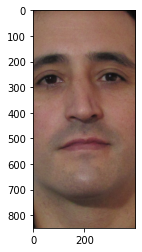

In [ ]:
recorte=foto[400:1250,600:1000]
plt.imshow(recorte)

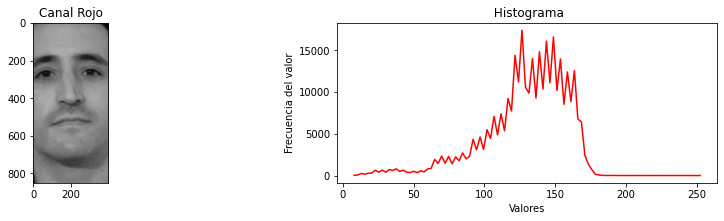

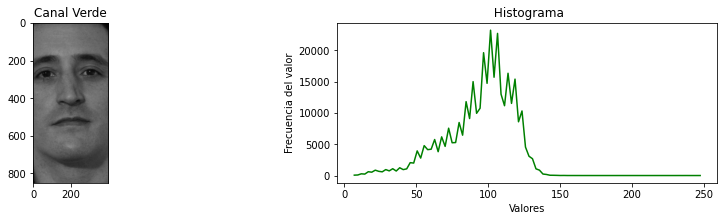

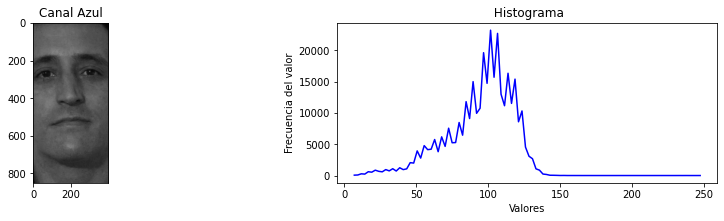

In [ ]:

plt.figure(figsize=(15,10))
plt.subplot(3,2, 1 )
plt.title('Canal Rojo')
plt.imshow(recorte[:,:,0],'gray' )

plt.subplot(3,2,2)
a, b = np.histogram(recorte[:,:,0],bins=100)
plt.title(' Histograma')
plt.xlabel('Valores')
plt.ylabel('Frecuencia del valor')
plt.plot(b[:-1] ,a, 'r'  )


plt.figure(figsize=(15,10))
plt.subplot(3,2, 3 )
plt.title('Canal Verde')
plt.imshow(recorte[:,:,1],'gray' )
 
 
plt.subplot(3,2,4)
a, b = np.histogram(recorte[:,:,1],bins=100)
plt.title(' Histograma')
plt.xlabel('Valores')
plt.ylabel('Frecuencia del valor')
plt.plot(b[:-1] ,a, 'g'  )

plt.figure(figsize=(15,10))
plt.subplot(3,2, 5 )
plt.title('Canal Azul')
plt.imshow(recorte[:,:,2],'gray' )

plt.subplot(3,2,6)
a, b = np.histogram(recorte[:,:,1],bins=100)
plt.title(' Histograma')
plt.xlabel('Valores')
plt.ylabel('Frecuencia del valor')
plt.plot(b[:-1] ,a, 'b'  )

plt.show()





Podemos ver en los histogramas, que la region del rostro , los valores del rojo son mas altos que los valores de los canales azul y verde. 
Esto nos dala condicion que buscamos para poder hacer la mascara roja . Queremos que valores del canal rojo sean mayores en un cierto porcentaje a los demas canales. Si se cumple esta condicion queremos que nos arroje un resultado booleano ***True***.


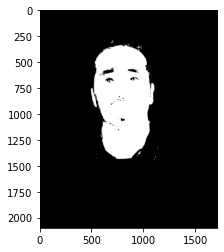

In [ ]:
filtro_1=foto.copy()#hacemos una 
filtro_1=(foto[:,:,0] > foto[:,:,1]*1.1) * (foto[:,:,0]>foto[:,:,2]*1.3) 


plt.imshow(filtro_1, 'gray')

Ahora , ya sabiendo la condicion que necesitamos , pintamos de rojo puro esa zona , anulando los demas canales . 

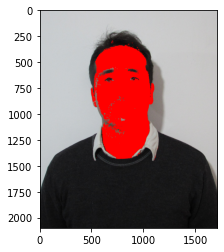

In [ ]:
rostro_rojo=foto.copy()

rostro_rojo[:,:,0][(foto[:,:,0] > foto[:,:,1]*1.2) * (foto[:,:,0]>foto[:,:,2]*1.3 )]=255
rostro_rojo[:,:,1][(foto[:,:,0] > foto[:,:,1]*1.2) * (foto[:,:,0]>foto[:,:,2]*1.3 )]=0
rostro_rojo[:,:,2][(foto[:,:,0] > foto[:,:,1]*1.2) * (foto[:,:,0]>foto[:,:,2]*1.3 )]=0
plt.imshow(rostro_rojo)